In [1]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

# Load the full scan

In [110]:
fc = FileChooser('/sf/alvra/data/p19636/raw/')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p19636/raw', filename='', title='HTML(value='', layout=Layout(display='none')…

In [111]:
quantile_corr = 0.8

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero117

#######################################################################################################33

(DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, 
 DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, 
 Izero_pump, Izero_unpump, correlation1, correlation2, Energy_eV, goodshots1, goodshots2) = XAS_scan_2diodes(fc.selected, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)


/gpfs/photonics/swissfel/raw/alvra/p19636/run0181/meta/scan.json

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   2001 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1999 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1999 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY 1982 / 2001 -> 1% loss ▇▇▇▇▇▇▇▇▇

over the whole data set: 1980 / 2001 -> 1% loss
complete channels: 1 / 4 -> 75% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 979 pump and 979 unpump shots
(623,) shots out of (979,) survived
(631,) shots out of (979,) survived
Step 107 of 107: Processed acq0107
correlation Diode1 (all shots) = 0.9971049795145739
correlation Diode2 (all shots) = 0.9973424150927992


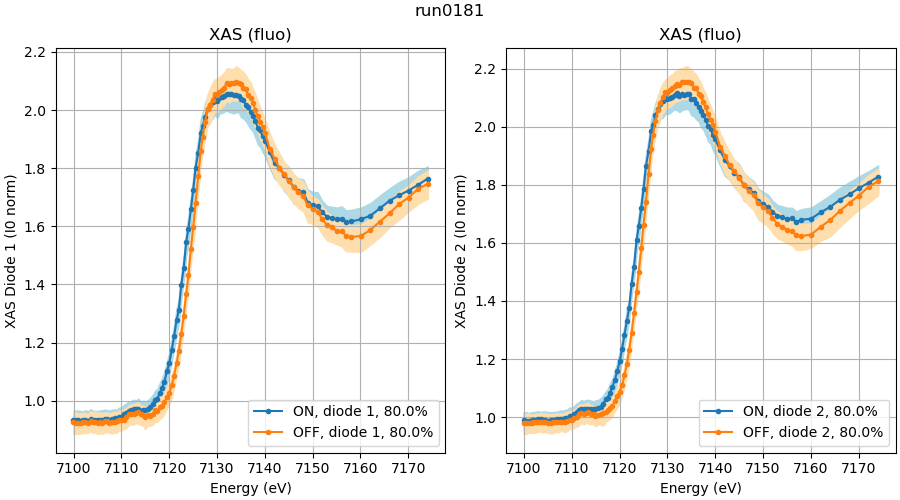

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-3], fontsize = 12)

#Pump_probe_relative = (DataFluo_pump - DataFluo_unpump) / DataFluo_unpump
XAS1_pump = DataDiode1_pump[:,0]
err1_low_pump = DataDiode1_pump[:,1]
err1_high_pump = DataDiode1_pump[:,2]
XAS1_unpump = DataDiode1_unpump[:,0]
err1_low_unpump = DataDiode1_unpump[:,1]
err1_high_unpump = DataDiode1_unpump[:,2]
XAS1_pump_probe = Pump_probe_Diode1[:,0]
err1_low_pump_probe = Pump_probe_Diode1[:,1]
err1_high_pump_probe = Pump_probe_Diode1[:,2]

XAS2_pump = DataDiode2_pump[:,0]
err2_low_pump = DataDiode2_pump[:,1]
err2_high_pump = DataDiode2_pump[:,2]
XAS2_unpump = DataDiode2_unpump[:,0]
err2_low_unpump = DataDiode2_unpump[:,1]
err2_high_unpump = DataDiode2_unpump[:,2]
XAS2_pump_probe = Pump_probe_Diode2[:,0]
err2_low_pump_probe = Pump_probe_Diode2[:,1]
err2_high_pump_probe = Pump_probe_Diode2[:,2]

# plt.subplot(1,2,1)
ax1.plot(Energy_eV, XAS1_pump, label='ON, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_pump, err1_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS1_unpump, label='OFF, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_unpump, err1_high_unpump, color='navajowhite')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1 (I0 norm)")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS2_pump, label='ON, diode 2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_pump, err2_high_pump, color='lightblue')

ax2.plot(Energy_eV, XAS2_unpump, label='OFF, diode 2, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_unpump, err2_high_unpump, color='navajowhite')
#ax2.set_ylim(0,3)
#ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("XAS Diode 2 (I0 norm)")
ax2.set_title('XAS (fluo)')
ax2.legend(loc="best")
ax2.grid()

plt.show()
#plt.savefig('/das/work/p18/p18387/exported_data/L-cystine_XAS.png')


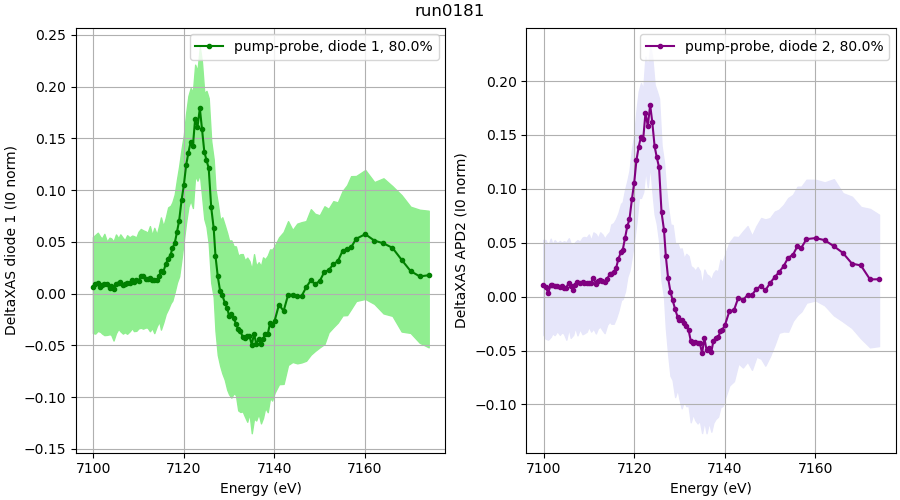

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-3], fontsize = 12)

# plt.subplot(1,2,1)
ax1.plot(Energy_eV, XAS1_pump_probe, label='pump-probe, diode 1, {}%'.format(quantile_corr*100),color='green', marker='.')
ax1.fill_between(Energy_eV,err1_low_pump_probe, err1_high_pump_probe, color='lightgreen')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("DeltaXAS diode 1 (I0 norm)")
ax1.set_title('')
ax1.legend(loc="best")
#ax1.set_ylim(-0.4,0.2)
ax1.grid()
# plt.tight_layout()

# plt.subplot(1,2,2)
ax2.plot(Energy_eV, XAS2_pump_probe, label='pump-probe, diode 2, {}%'.format(quantile_corr*100),color='purple', marker='.')
ax2.fill_between(Energy_eV,err2_low_pump_probe, err2_high_pump_probe, color='lavender')
#ax2.set_ylim(-0.04,0.04)

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("DeltaXAS APD2 (I0 norm)")
ax2.set_title('')
ax2.legend(loc="best")
ax2.grid()
# plt.tight_layout()


plt.show()


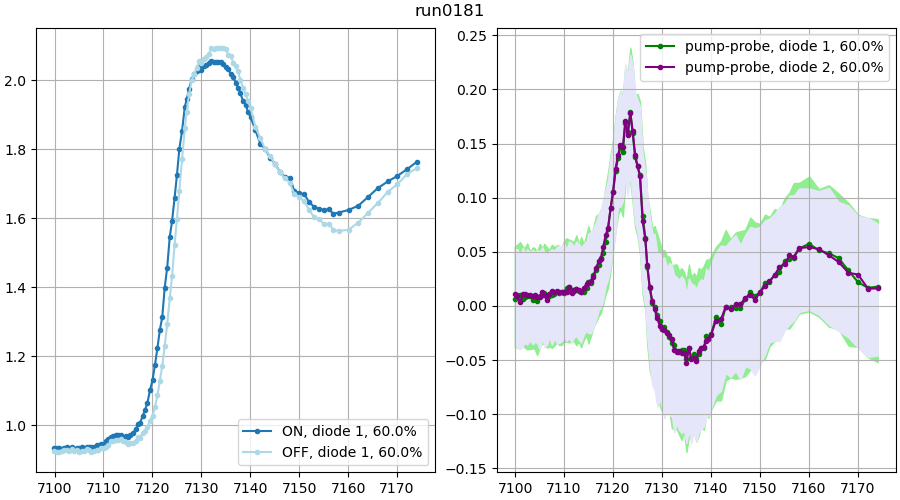

In [203]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle(fc.selected.split('/')[-3], fontsize = 12)

ax1.plot(Energy_eV, XAS1_pump, label='ON, diode 1, {}%'.format(quantile_corr*100),marker='.')
ax1.plot(Energy_eV, XAS1_unpump, label='OFF, diode 1, {}%'.format(quantile_corr*100),marker='.', color='lightblue')

#ax1.plot(Energy_eV, XAS2_pump, label='ON, diode 2, {}%'.format(quantile_corr*100),marker='.')
#ax1.plot(Energy_eV, XAS2_unpump, label='OFF, diode 2, {}%'.format(quantile_corr*100),marker='.', color='navajowhite')

ax1.legend(loc="best")
ax1.grid()

ax2.plot(Energy_eV, XAS1_pump_probe, label='pump-probe, diode 1, {}%'.format(quantile_corr*100), color='green', marker='.')
ax2.fill_between(Energy_eV,err1_low_pump_probe, err1_high_pump_probe, color='lightgreen')
ax2.plot(Energy_eV, XAS2_pump_probe, label='pump-probe, diode 2, {}%'.format(quantile_corr*100), color='purple', marker='.')
ax2.fill_between(Energy_eV,err2_low_pump_probe, err2_high_pump_probe, color='lavender')
ax2.legend(loc="best")
ax2.grid()

# ax1.axvline(6546)
# ax1.axvline(6558)
# ax1.axvline(6565)
# #ax1.axvline(6552)

# ax2.axvline(6546)
# ax2.axvline(6558)
# ax2.axvline(6565)
#ax2.axvline(6552)

plt.show()


In [ ]:
with open(fc.selected) as json_file:
    data = json.load(json_file)
    En = np.array(data['scan_values']).ravel()

## Check correlation for a certain energy point

### For a single diode, ON & OFF

In [212]:
chosen_energy = 7134

detector_XAS = channel_diode_1
detector_Izero = channel_Izero117

quantile_corr = 0.6
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

print ('Energy = {} eV'.format(Energy_eV[index_energy]))

(351,) shots out of (992,) survived
Correlation (all shots)      = 0.997646633734667
Correlation (filtered shots) = 0.9993478887676979
Energy = 7134.016475997909 eV


In [215]:
from scipy import stats
#m,b = np.polyfit(Izero_pump,Fluo_pump, 1)
#m_filter,b_filter = np.polyfit(Izero_pump_filter,Fluo_pump_filter, 1)
m_median = np.median(Fluo_pump/Izero_pump)
m_median_filter = np.median(Fluo_pump_filter/Izero_pump_filter)
print (m_median, m_median_filter)

MAD = stats.median_absolute_deviation(Fluo_pump/Izero_pump)
MAD_filter = stats.median_absolute_deviation(Fluo_pump_filter/Izero_pump_filter)

print (MAD, MAD_filter)

print (MAD/m_median*100, MAD_filter/m_median_filter*100)

2.0506946742622043 2.0534450402297346
0.0595363328170522 0.03662746834272399
2.903227553291037 1.7837082378706466


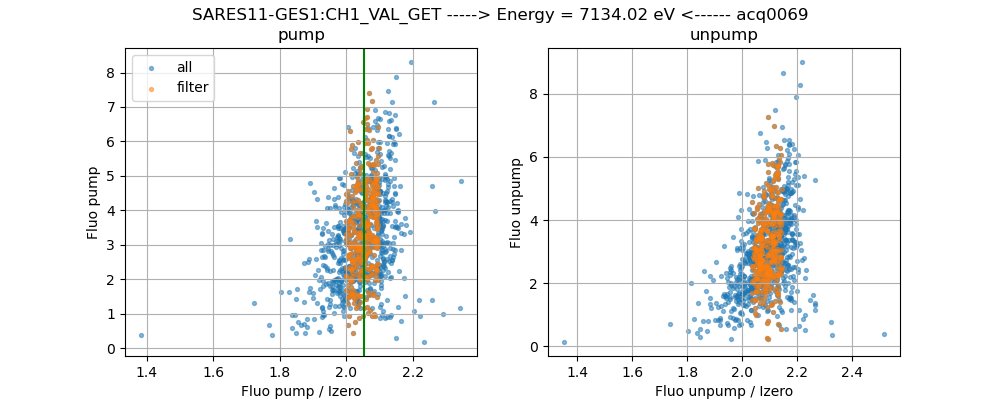

In [216]:
plt.figure(figsize=(10,4))
plt.suptitle('{} -----> Energy = {:.2f} eV <------ {}'.format(detector_XAS,Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))
plt.subplot(121)
plt.title('pump')
plt.scatter(Fluo_pump/Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
plt.scatter(Fluo_pump_filter/Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
plt.axvline(x=m_median_filter, color = 'green')
plt.legend(loc='best')
plt.xlabel('Fluo pump / Izero')
plt.ylabel('Fluo pump')
plt.grid()


plt.subplot(122)
plt.title('unpump')
plt.scatter(Fluo_unpump/Izero_unpump, Fluo_unpump, s=8, alpha = 0.5,  label = 'all')
plt.scatter(Fluo_unpump_filter/Izero_unpump_filter, Fluo_unpump_filter, s=8, alpha = 0.5, label='filter')
plt.xlabel('Fluo unpump / Izero')
plt.ylabel('Fluo unpump')
plt.grid()
plt.show()

### For a the 2 diodes, (only OFF)

(624,) shots out of (985,) survived


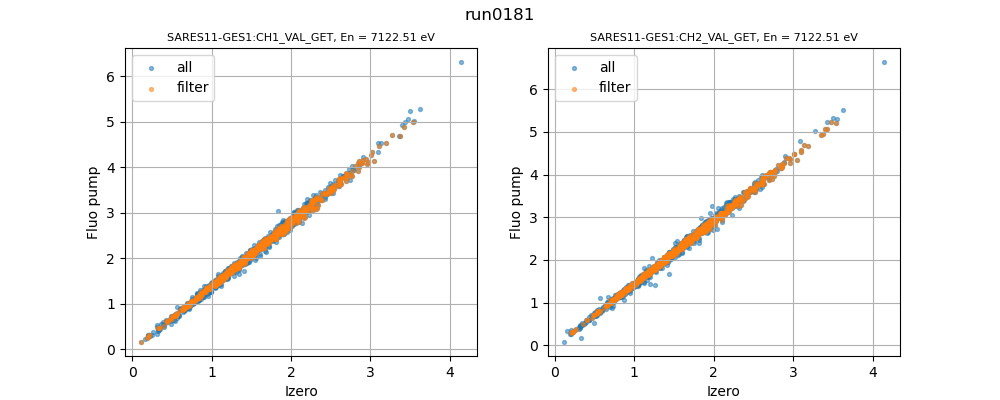

In [210]:
chosen_energy = 7122.5

detector_XAS = channel_diode_1
detector_Izero = channel_Izero117

quantile_corr = 0.8
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

#print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
#print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

#print ('Energy = {} eV'.format(Energy_eV[index_energy]))

fig,ax = plt.subplots(1,2,figsize=(10,4))
fig.suptitle(fc.selected.split('/')[-3], fontsize = 12)

ax[0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0].scatter(Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[0].scatter(Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[0].legend(loc='best')
ax[0].set_xlabel('Izero')
ax[0].set_ylabel('Fluo pump')
ax[0].grid()


#################################################################

detector_XAS = channel_diode_2
detector_Izero = channel_Izero117

#################################################################
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo_pump, Fluo_unpump, Izero_pump, Izero_unpump, 
 Fluo_pump_filter, Fluo_unpump_filter, Izero_pump_filter, Izero_unpump_filter) = \
Get_correlation_from_scan(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

#print ('Correlation (all shots)      = {}'.format(pearsonr(Izero_pump,Fluo_pump)[0]))
#print ('Correlation (filtered shots) = {}'.format(pearsonr(Izero_pump_filter,Fluo_pump_filter)[0]))

#print ('Energy = {} eV'.format(Energy_eV[index_energy]))

ax[1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1].scatter(Izero_pump, Fluo_pump, s=8, alpha = 0.5,  label = 'all')
ax[1].scatter(Izero_pump_filter, Fluo_pump_filter, s=8, alpha = 0.5, label='filter')
ax[1].legend(loc='best')
ax[1].set_xlabel('Izero')
ax[1].set_ylabel('Fluo pump')
ax[1].grid()

## Load files in a loop

In [8]:
datafiles = []
for file in glob('/sf/alvra/data/p19506/raw/scan_info/*_XAS_ZnO_com_80ps_*'):
    datafiles.append(file)
datafiles = sorted(datafiles, key = os.path.getmtime)
patch = datafiles[:2]
patch

['/sf/alvra/data/p19506/raw/scan_info/043_XAS_ZnO_com_80ps_1.json',
 '/sf/alvra/data/p19506/raw/scan_info/044_XAS_ZnO_com_80ps_0.json']

In [9]:
quantile_corr = 0.4

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero117

#######################################################################################################33
from sfdata import SFScanInfo
import itertools

DataDiode1_pump_all = []
DataDiode1_unpump_all = []
Pump_probe1_all = []

DataDiode2_pump_all = []
DataDiode2_unpump_all = []
Pump_probe2_all = []

for json_file in patch:
    scan = SFScanInfo(json_file)
    Energy_eV = scan.readbacks
        
    DataDiode1_pump = []
    DataDiode1_unpump = []
    Pump_probe_Diode1 = []
    
    DataDiode2_pump = []
    DataDiode2_unpump = []
    Pump_probe_Diode2 = []
    
    (DataDiode1_pump, DataDiode1_unpump, Pump_probe_Diode1, 
     DataDiode2_pump, DataDiode2_unpump, Pump_probe_Diode2, _, _, _, _, 
     Energy_eV) = XAS_scan_2diodes(json_file, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)
        
    DataDiode1_pump_all.append(DataDiode1_pump)
    DataDiode1_unpump_all.append(DataDiode1_unpump)
    Pump_probe1_all.append(Pump_probe_Diode1)    
    
    DataDiode2_pump_all.append(DataDiode2_pump)
    DataDiode2_unpump_all.append(DataDiode2_unpump)
    Pump_probe2_all.append(Pump_probe_Diode2) 
    
DataDiode1_pump_all = np.array(DataDiode1_pump_all)
DataDiode1_unpump_all = np.array(DataDiode1_unpump_all)
Pump_probe1_all = np.array(Pump_probe1_all)
DataDiode2_pump_all = np.array(DataDiode2_pump_all)
DataDiode2_unpump_all = np.array(DataDiode2_unpump_all)
Pump_probe2_all = np.array(Pump_probe2_all)


/sf/alvra/data/p19506/raw/scan_info/044_XAS_ZnO_com_80ps_0.json

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1002 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS117:INTENSITY  999 / 1002 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 999 / 1002 -> 0% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 498 pump and 498 unpump shots
(81,) shots out of (498,) survived
(78,) shots out of (498,) survived
Step 65 of 65: Processed run_003418
correlation Diode1 (all shots) = 0.9687411353498918
correlation Diode2 (all shots) = 0.9726016650173293


<IPython.core.display.Javascript object>


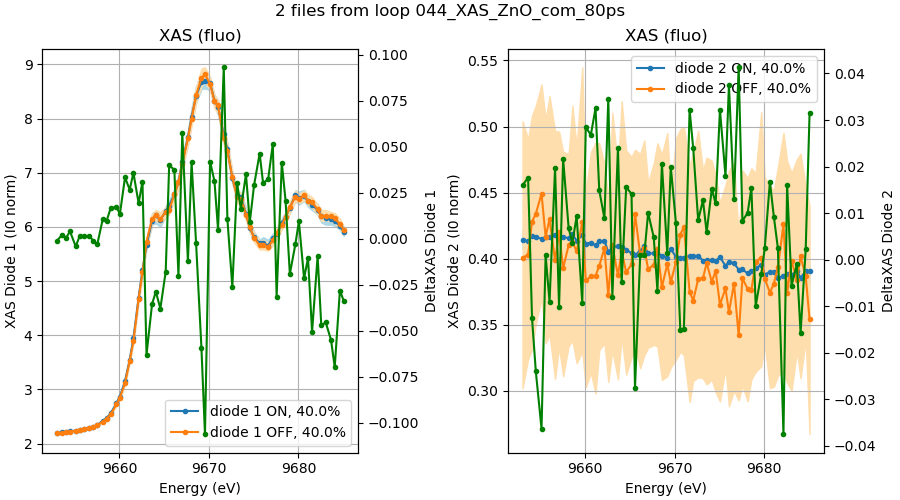

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), constrained_layout=True)
plt.suptitle('{} files from loop {}'.format(len(patch), json_file.split('/')[-1][:-7]))

XAS1_pump = np.mean(DataDiode1_pump_all, axis=0)[:,0]
err1_low_pump = np.mean(DataDiode1_pump_all, axis=0)[:,1]
err1_high_pump = np.mean(DataDiode1_pump_all, axis=0)[:,2]
XAS1_unpump = np.mean(DataDiode1_unpump_all, axis=0)[:,0]
err1_low_unpump = np.mean(DataDiode1_unpump_all, axis=0)[:,1]
err1_high_unpump = np.mean(DataDiode1_unpump_all, axis =0)[:,2]
XAS1_pump_probe = np.mean(Pump_probe1_all, axis=0)[:,0]
err1_low_pump_probe = np.mean(Pump_probe1_all, axis=0)[:,1]
err1_high_pump_probe = np.mean(Pump_probe1_all, axis=0)[:,2]

XAS2_pump = np.mean(DataDiode2_pump_all, axis=0)[:,0]
err2_low_pump = np.mean(DataDiode2_pump_all, axis=0)[:,1]
err2_high_pump = np.mean(DataDiode2_pump_all, axis=0)[:,2]
XAS2_unpump = np.mean(DataDiode2_unpump_all, axis=0)[:,0]
err2_low_unpump = np.mean(DataDiode2_unpump_all, axis=0)[:,1]
err2_high_unpump = np.mean(DataDiode2_unpump_all, axis =0)[:,2]
XAS2_pump_probe = np.mean(Pump_probe2_all, axis=0)[:,0]
err2_low_pump_probe = np.mean(Pump_probe2_all, axis=0)[:,1]
err2_high_pump_probe = np.mean(Pump_probe2_all, axis=0)[:,2]


ax3 = ax1.twinx()

ax1.plot(Energy_eV, XAS1_pump, label='diode 1 ON, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_pump, err1_high_pump, color='lightblue')

ax1.plot(Energy_eV, XAS1_unpump, label='diode 1 OFF, {}%'.format(quantile_corr*100),marker='.')
ax1.fill_between(Energy_eV, err1_low_unpump, err1_high_unpump, color='navajowhite')

ax3.plot(Energy_eV, XAS1_pump_probe, label='diode 1 pp, {}%'.format(quantile_corr*100),marker='.', color='g')

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("XAS Diode 1 (I0 norm)")
ax3.set_ylabel ("DeltaXAS Diode 1")
ax1.set_title('XAS (fluo)')
ax1.legend(loc="best")
ax1.grid()

ax4 = ax2.twinx()

ax2.plot(Energy_eV, XAS2_pump, label='diode 2 ON, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_pump, err2_high_pump, color='lightblue')

ax2.plot(Energy_eV, XAS2_unpump, label='diode 2 OFF, {}%'.format(quantile_corr*100),marker='.')
ax2.fill_between(Energy_eV, err2_low_unpump, err2_high_unpump, color='navajowhite')

ax4.plot(Energy_eV, XAS2_pump_probe, label='diode 2 pp, {}%'.format(quantile_corr*100),marker='.', color='g')

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel ("XAS Diode 2 (I0 norm)")
ax4.set_ylabel ("DeltaXAS Diode 2")
ax2.set_title('XAS (fluo)')
ax2.legend(loc="best")
ax2.grid()

#ax1.legend(loc='best')
#ax2.legend(loc='lower right')
#ax1.set_xlabel('Energy (eV)')
#ax1.set_ylabel('XAS norm')
#ax2.set_ylabel('difference')
#ax1.grid()
plt.show()

## cell to export data

In [ ]:
import pandas as pd
DIR_save = "/das/work/p18/p18956/UserFolder/"
file2save = DIR_save + scan_name + ".txt"
pd.DataFrame({
    'Energy_eV' : Energy_eV,
    'pump_probe': Pump_probe,
    'signal_on' : DataFluo_pump,
    'signal_off' : DataFluo_unpump,
}).to_csv(file2save,index=False)